Download mirflickr25k for training SRGAN model.

In [ ]:
!wget http://press.liacs.nl/mirflickr/mirflickr25k.v3b/mirflickr25k.zip

--2024-04-25 12:59:34--  http://press.liacs.nl/mirflickr/mirflickr25k.v3b/mirflickr25k.zip
Resolving press.liacs.nl (press.liacs.nl)... 132.229.137.37
Connecting to press.liacs.nl (press.liacs.nl)|132.229.137.37|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://press.liacs.nl/mirflickr/mirflickr25k.v3b/mirflickr25k.zip [following]
--2024-04-25 12:59:34--  https://press.liacs.nl/mirflickr/mirflickr25k.v3b/mirflickr25k.zip
Connecting to press.liacs.nl (press.liacs.nl)|132.229.137.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3069184257 (2.9G) [application/zip]
Saving to: ‘mirflickr25k.zip’

mirflickr25k.zip    100%[===================>]   2.86G  20.4MB/s    in 2m 28s  

2024-04-25 13:02:02 (19.8 MB/s) - ‘mirflickr25k.zip’ saved [3069184257/3069184257]



In [ ]:
!unzip mirflickr25k.zip

Streaming output truncated to the last 5000 lines.
  inflating: mirflickr/meta/tags_raw/tags5499.txt  
 extracting: mirflickr/meta/tags_raw/tags55.txt  
  inflating: mirflickr/meta/tags_raw/tags550.txt  
  inflating: mirflickr/meta/tags_raw/tags5500.txt  
  inflating: mirflickr/meta/tags_raw/tags5501.txt  
 extracting: mirflickr/meta/tags_raw/tags5502.txt  
 extracting: mirflickr/meta/tags_raw/tags5503.txt  
 extracting: mirflickr/meta/tags_raw/tags5504.txt  
  inflating: mirflickr/meta/tags_raw/tags5505.txt  
 extracting: mirflickr/meta/tags_raw/tags5506.txt  
 extracting: mirflickr/meta/tags_raw/tags5507.txt  
 extracting: mirflickr/meta/tags_raw/tags5508.txt  
  inflating: mirflickr/meta/tags_raw/tags5509.txt  
 extracting: mirflickr/meta/tags_raw/tags551.txt  
 extracting: mirflickr/meta/tags_raw/tags5510.txt  
 extracting: mirflickr/meta/tags_raw/tags5511.txt  
 extracting: mirflickr/meta/tags_raw/tags5512.txt  
  inflating: mirflickr/meta/tags_raw/tags5513.txt  
  inflating: mirf

In [ ]:
!rm -r /content/mirflickr/doc
!rm -r /content/mirflickr/meta

In [ ]:
!rm -r data

In [ ]:
!mkdir data
!mkdir data/lr_images
!mkdir data/hr_images

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

train_dir = "mirflickr/"

for img in os.listdir(train_dir):
  img_array = cv2.imread(train_dir + img)
  if img_array is not None:
    img_array = cv2.resize(img_array, (128, 128))
    lr_img_array = cv2.resize(img_array,(32, 32))
    cv2.imwrite("/content/data/hr_images/" + img, img_array)
    cv2.imwrite("/content/data/lr_images/"+ img, lr_img_array)
  else:
    print(f"Failed to read image: {img}")

In [ ]:
import numpy as np
import os
import cv2

n = 5000
lr_list = os.listdir("data/lr_images/")[:n]

lr_images = []
for img in lr_list:
    img_lr = cv2.imread("data/lr_images/" + img)
    img_lr = cv2.cvtColor(img_lr, cv2.COLOR_BGR2RGB)
    lr_images.append(img_lr)


hr_list = os.listdir("data/hr_images/")[:n]

hr_images = []
for img in hr_list:
    img_hr = cv2.imread("data/hr_images/" + img)
    img_hr = cv2.cvtColor(img_hr, cv2.COLOR_BGR2RGB)
    hr_images.append(img_hr)

lr_images = np.array(lr_images)
hr_images = np.array(hr_images)

# Save lr_images
np.save('lr_images.npy', lr_images)

# Save hr_images
np.save('hr_images.npy', hr_images)

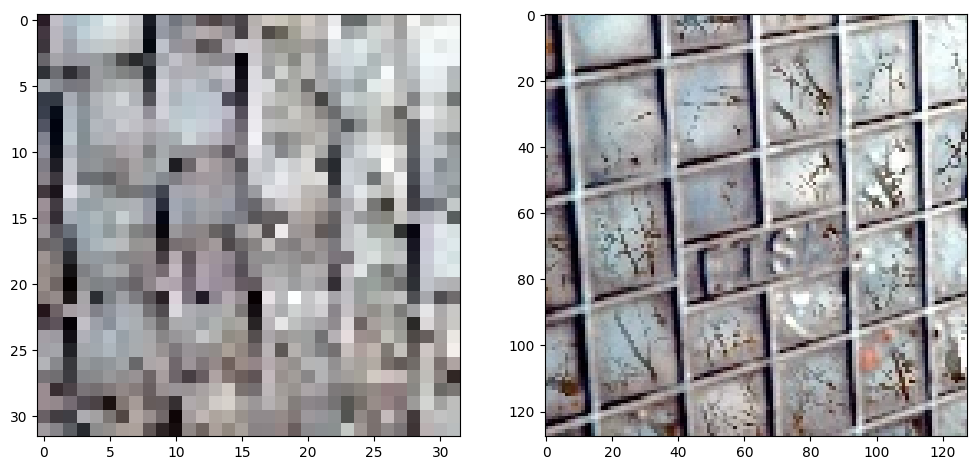

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Load lr_images
# lr_images = np.load('lr_images.npy')

# Load hr_images
# hr_images = np.load('hr_images.npy')

image_number = random.randint(0, len(lr_images) - 1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(lr_images[image_number], (32, 32, 3)))
plt.subplot(122)
plt.imshow(np.reshape(hr_images[image_number], (128, 128, 3)))
plt.show()

In [ ]:
import numpy as np

# Load lr_images
lr_images = np.load('lr_images.npy') / 255.

# Load hr_images
hr_images = np.load('hr_images.npy') / 255.

# Save lr_images
np.save('lr_images.npy', lr_images)

# Save hr_images
np.save('hr_images.npy', hr_images)

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np

# Load lr_images
lr_images = np.load('lr_images.npy')

# Load hr_images
hr_images = np.load('hr_images.npy')

# Split to train and test
lr_train, lr_test, hr_train, hr_test = train_test_split(lr_images, hr_images,
                                                      test_size=0.33, random_state=42)

hr_shape = (hr_train.shape[1:])
lr_shape = (lr_train.shape[1:])

In [2]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
from blocks import blocks
from keras.layers import UpSampling2D, LeakyReLU, Dense, Input, add

lr_ip = Input(shape=lr_shape)
hr_ip = Input(shape=hr_shape)

generator = blocks.create_gen(lr_ip, num_res_block = 16)
generator.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   15616       ['input_1[0][0]']                
                                                                                                  
 p_re_lu (PReLU)                (None, 32, 32, 64)   64          ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   36928       ['p_re_lu[0][0]']                
                                                                                              

In [3]:
discriminator = blocks.create_disc(hr_ip)
discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
discriminator.summary()

vgg = blocks.build_vgg((128,128,3))
vgg.trainable = False

gan_model = blocks.create_comb(generator, discriminator, vgg, lr_ip, hr_ip)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_37 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 64)      0         
                                                                 
 conv2d_38 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization_33 (Bat  (None, 64, 64, 64)       256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                           

In [4]:
gan_model.compile(loss=["binary_crossentropy", "mse"], loss_weights=[1e-3, 1], optimizer="adam")
gan_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 model (Functional)             (None, 128, 128, 3)  2044291     ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               


                                )]                                                                
                                                                                                  
 model_1 (Functional)           (None, 1)            38249281    ['model[0][0]']                  
                                                                                                  
 model_2 (Functional)           (None, 32, 32, 256)  2325568     ['model[0][0]']                  
                                                                                                  
Total params: 42,619,140
Trainable params: 2,040,067
Non-trainable params: 40,579,073
__________________________________________________________________________________________________


In [5]:
# Create a list of images for LR and HR in batches from which a batch of images
# would be fetched during training.
batch_size = 4
train_lr_batches = []
train_hr_batches = []
for it in range(int(hr_train.shape[0] / batch_size)):
    start_idx = it * batch_size
    end_idx = start_idx + batch_size
    train_hr_batches.append(hr_train[start_idx:end_idx])
    train_lr_batches.append(lr_train[start_idx:end_idx])

In [6]:
from tqdm import tqdm

epochs = 10
#Enumerate training over epochs
for e in range(epochs):

    fake_label = np.zeros((batch_size, 1)) # Assign a label of 0 to all fake (generated images)
    real_label = np.ones((batch_size,1)) # Assign a label of 1 to all real images.

    #Create empty lists to populate gen and disc losses.
    g_losses = []
    d_losses = []

    #Enumerate training over batches.
    for b in tqdm(range(len(train_hr_batches))):
        lr_imgs = train_lr_batches[b] #Fetch a batch of LR images for training
        hr_imgs = train_hr_batches[b] #Fetch a batch of HR images for training

        fake_imgs = generator.predict_on_batch(lr_imgs) #Fake images

        #First, train the discriminator on fake and real HR images.
        discriminator.trainable = True
        d_loss_gen = discriminator.train_on_batch(fake_imgs, fake_label)
        d_loss_real = discriminator.train_on_batch(hr_imgs, real_label)

        #Now, train the generator by fixing discriminator as non-trainable
        discriminator.trainable = False

        #Average the discriminator loss, just for reporting purposes.
        d_loss = 0.5 * np.add(d_loss_gen, d_loss_real)

        #Extract VGG features, to be used towards calculating loss
        image_features = vgg.predict(hr_imgs)

        #Train the generator via GAN.
        #Remember that we have 2 losses, adversarial loss and content (VGG) loss
        g_loss, _, _ = gan_model.train_on_batch([lr_imgs, hr_imgs], [real_label, image_features])

        #Save losses to a list so we can average and report.
        d_losses.append(d_loss)
        g_losses.append(g_loss)

    #Convert the list of losses to an array to make it easy to average
    g_losses = np.array(g_losses)
    d_losses = np.array(d_losses)

    #Calculate the average losses for generator and discriminator
    g_loss = np.sum(g_losses, axis=0) / len(g_losses)
    d_loss = np.sum(d_losses, axis=0) / len(d_losses)

    #Report the progress during training.
    print("epoch:", e+1 ,"g_loss:", g_loss, "d_loss:", d_loss)

    if (e+1) % 10 == 0: #Change the frequency for model saving, if needed
        #Save the generator after every n epochs (Usually 10 epochs)
        generator.save("gen_e_"+ str(e+1) +".h5")


  0%|          | 0/478 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


In [7]:
generator.save("srgan.h5")

In [6]:
#Test - perform super resolution using saved generator model
from keras.models import load_model
from numpy.random import randint
import matplotlib.pyplot as plt

generator = load_model('gen_e_10.h5', compile=False)


[X1, X2] = [lr_test, hr_test]
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]

# generate image from source
gen_image = generator.predict(src_image)

1/1 [==============================] - 1s 891ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


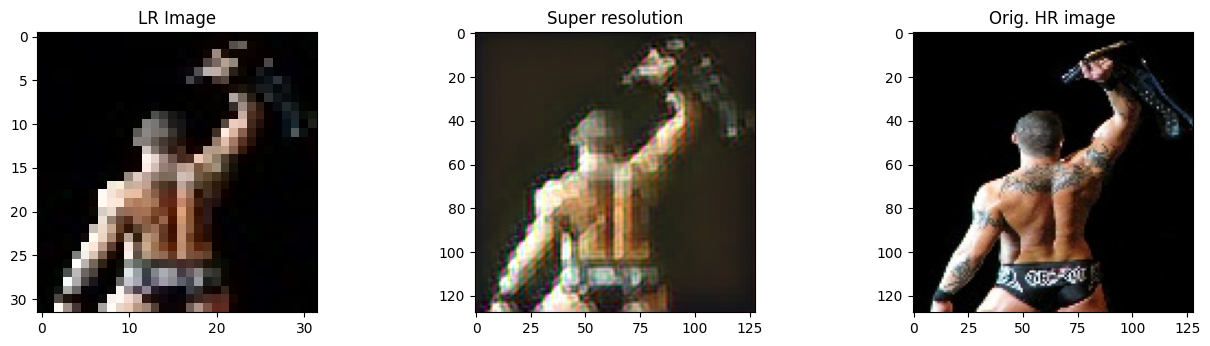

In [7]:
# plot all three images

plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1)
plt.title('LR Image')
plt.imshow(src_image[0,:,:,:])
plt.subplot(2, 3, 2)
plt.title('Super resolution')
plt.imshow(gen_image[0,:,:,:])
plt.subplot(2, 3, 3)
plt.title('Orig. HR image')
plt.imshow(tar_image[0,:,:,:])

plt.show()